# Exciton Model for vdWHs

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import ase.units

Hartree = ase.units.Hartree
Bohr = ase.units.Bohr

In [23]:
%matplotlib inline

In [24]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [42]:
def heatmap(data, xlabels, ylabels, cbarlabel, **kwargs):
    # if not ax:
    #     ax = plt.gca()
    
    plt.imshow(data, **kwargs)
    plt.xticks(np.arange(len(xlabels)), labels=xlabels)
    plt.yticks(np.arange(len(ylabels)), labels=ylabels)

    im_ratio = data.shape[0]/data.shape[1]
    plt.colorbar(label=cbarlabel,fraction=0.046*im_ratio, pad=0.04)
    # cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            colors = ['k', 'w']
            color = colors[int(data[i,j] > np.mean(data))]
            plt.text(j, i, data[i, j], ha="center", va="center", color=color)

## QEH Masses and Potentials

In [43]:
#materials = ['WS2','MoS2','WSe2','MoSe2','CrS2','CrSe2']
nFilling = 1
nPadding = 0
default_thick = 6
def load_hs(fileprefix,default_thick, nFilling, nPadding):
    vdWH = np.load(fileprefix + '_nFilling=' + str(nFilling) + '_nPadding=' + str(nPadding)+'_default_thick'+str(default_thick)+ '.npz')
    return vdWH

In [50]:
vdWH_qeh = load_hs('wannier',default_thick, nFilling, nPadding)
E_b_heat_mat = vdWH_qeh['E_b_heat_mat']
E_b_heat_xlabels = vdWH_qeh['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_qeh['E_b_heat_ylabels']

In [51]:
#datacheck
def check_data(Matrix,E_b_heat_xlabels,E_b_heat_ylabels):
    EbMax=10
    #E_b_heat_mat[1,2]=10
    #print(E_b_heat_mat)
    UpperBound=9
    while EbMax>UpperBound:
        EbMax=np.max(E_b_heat_mat)
        if EbMax>UpperBound:
            #print(np.where(Eb_original==Ebmax))
            ne=np.where(E_b_heat_mat==EbMax)[0][0]
            ph=np.where(E_b_heat_mat==EbMax)[1][0]
            print(ne,ph)
            Matrix=np.delete(Matrix,ne,axis=0)#delete row
            Matrix=np.delete(Matrix,ph,axis=1)#delete column
            E_b_heat_xlabels=np.delete(E_b_heat_xlabels,ph)
            E_b_heat_ylabels=np.delete(E_b_heat_ylabels,ne)
            print(Matrix)
        else:
            print('No altering needed:)')
    return Matrix,E_b_heat_xlabels,E_b_heat_ylabels
E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels=check_data(E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels)

No altering needed:)


In [52]:
Ne,Nh=np.shape(E_b_heat_mat)
Eb_original=np.copy(E_b_heat_mat)
EbPlot=np.zeros((Ne,Nh))
Ebmax=np.max(Eb_original)
#print(np.where(Eb_original==Ebmax))
ne=np.where(Eb_original==Ebmax)[0][0]
ph=np.where(Eb_original==Ebmax)[1][0]
#print(ne,ph)
EbPlot[0,0]=Ebmax
Eb_original[ne,ph]=0
#initialize new labels
xlabelsPlot=[]
ylabelsPlot=[]
#add first elements to label
xlabelsPlot.append(E_b_heat_xlabels[ph])
ylabelsPlot.append(E_b_heat_ylabels[ne])
#initialize new orders
ColumnOrder=np.zeros((Nh))
RowOrder=np.zeros((Ne))
ColumnOrder[0]=ph
RowOrder[1]=ne
# vectors to sort by 
EbColumnsort=np.copy(Eb_original)[ne,:]
EbRowsort=np.copy(Eb_original)[:,ph]
#check with print statements
print(EbColumnsort)
print(EbRowsort)
print(EbPlot)
#sort p-doped materials (coloumns)
for i_h in range(1,Nh):
    #find max
    Ebmax_h=np.max(EbColumnsort)
    locmax_h=np.argmax(EbColumnsort)
    #update order and new energies and xlabel
    ColumnOrder[i_h]=locmax_h#update list of column orders
    EbColumnsort[locmax_h]=0#delete maximum from sorting energies
    EbPlot[0,i_h]=Ebmax_h#update Eb_matrix
    xlabelsPlot.append(E_b_heat_xlabels[locmax_h])#update xlabel
    #check with prints
    print(locmax_h)
    print(EbPlot)
    print(EbColumnsort)
    print(E_b_heat_xlabels[locmax_h])
    print(xlabelsPlot[i_h])

#sort n-doped materials (rows)
for i_e in range(1,Ne):
    #find max
    Ebmax_e=np.max(EbRowsort)
    locmax_e=np.argmax(EbRowsort)
    #update order and new energies and xlabel
    RowOrder[i_e]=locmax_e#update list of column orders
    EbRowsort[locmax_e]=0#delete maximum from sorting energies
    EbPlot[i_e,0]=Ebmax_e#add energy to Eb_matrix
    ylabelsPlot.append(E_b_heat_ylabels[locmax_e])#add label to xlabel
    #check with prints
    print(locmax_e)
    print(EbPlot)
    print(E_b_heat_ylabels[locmax_e])
#put in the rest of the elements in the energy matrix
for ie in range(1,Ne):
    for ih in range(1,Nh):
        #take locations
        loce=int(RowOrder[ie])
        loch=int(ColumnOrder[ih])
        print(loce,loch)
        #find energy and update
        Eb=Eb_original[loce,loch]
        EbPlot[ie,ih]=Eb

#sort future matrices
def sort_matrix(Matrix,RowOrder,ColumnOrder):
    MatrixSort=np.zeros((Ne,Nh))
    for ie in range(Ne):
        for ih in range(Nh):
            #take locations
            loce=int(RowOrder[ie])
            loch=int(ColumnOrder[ih])
            print(loce,loch)
            #find energy and update
            Eb=Matrix[loce,loch]
            MatrixSort[ie,ih]=Eb
    return MatrixSort
        

[0.32095679 0.28660032 0.26702125 0.23517586 0.29631056 0.35141964
 0.31584529 0.30062007 0.26758719 0.22013895 0.36509161 0.33157513
 0.31192104 0.         0.35430904 0.24584244 0.19199947 0.29412924
 0.24186608 0.30382288 0.24105866 0.36651109 0.3870419  0.32980176]
[0.30238191 0.27743118 0.26197812 0.23442811 0.3184423  0.29354706
 0.2830852  0.25570736 0.32622893 0.30693614 0.29124771 0.
 0.39057516 0.40684774]
[[0.4079332 0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.      

In [53]:
def plot_E_B(E_b_heat_mat,E_b_heat_xlabels=xlabelsPlot,E_b_heat_ylabels=ylabelsPlot, cbarlabel = r'$E_b$ [meV]', file_ending='unknown'):
    heatmap(np.round(E_b_heat_mat*10**3).astype(int),
        E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=cbarlabel,
        cmap='Blues')
    plt.tight_layout()
    plt.savefig('./plots/vdWH_E_b_' + file_ending + '.pdf')
    plt.savefig('./plots/vdWH_E_b_' + file_ending + '.png')
    plt.show()

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 1 inner hBN layers
 using QEH masses and potentials


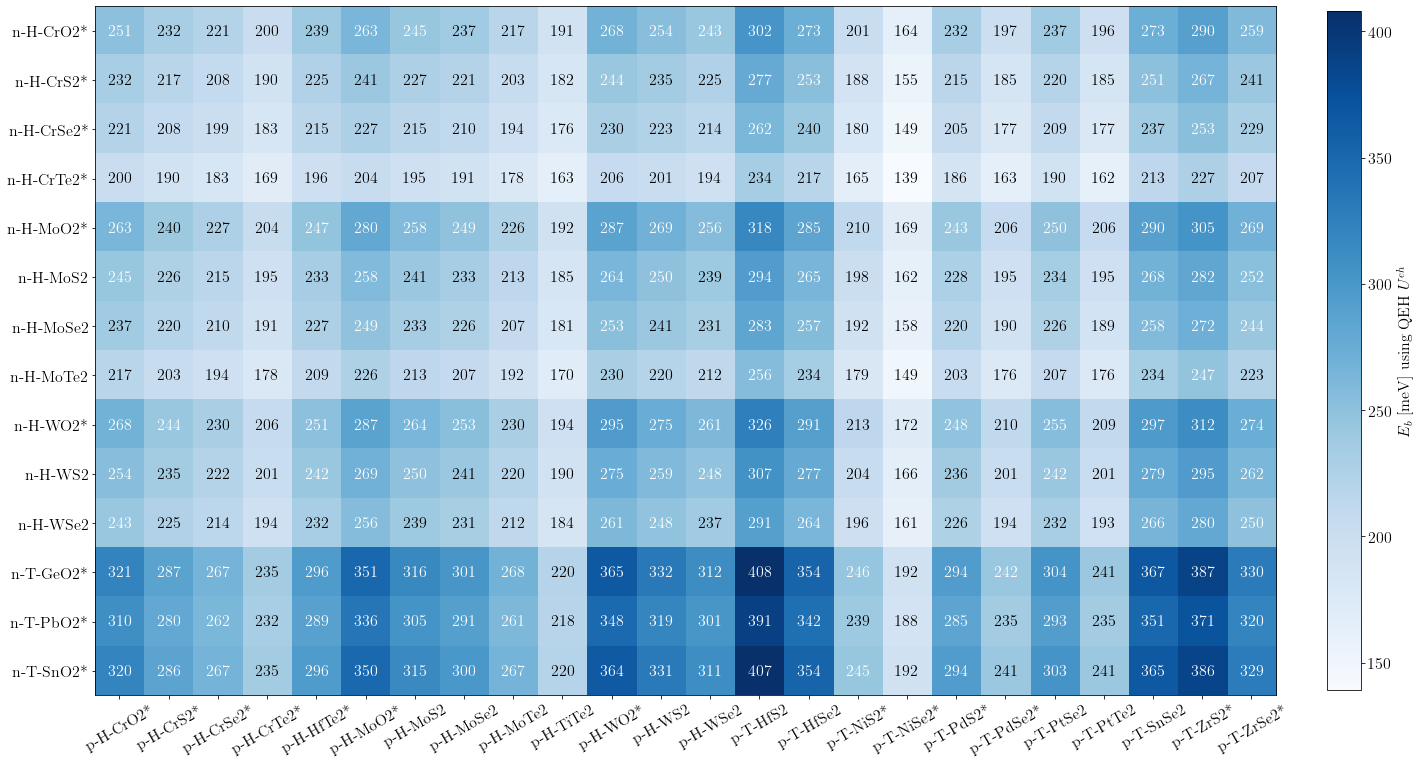

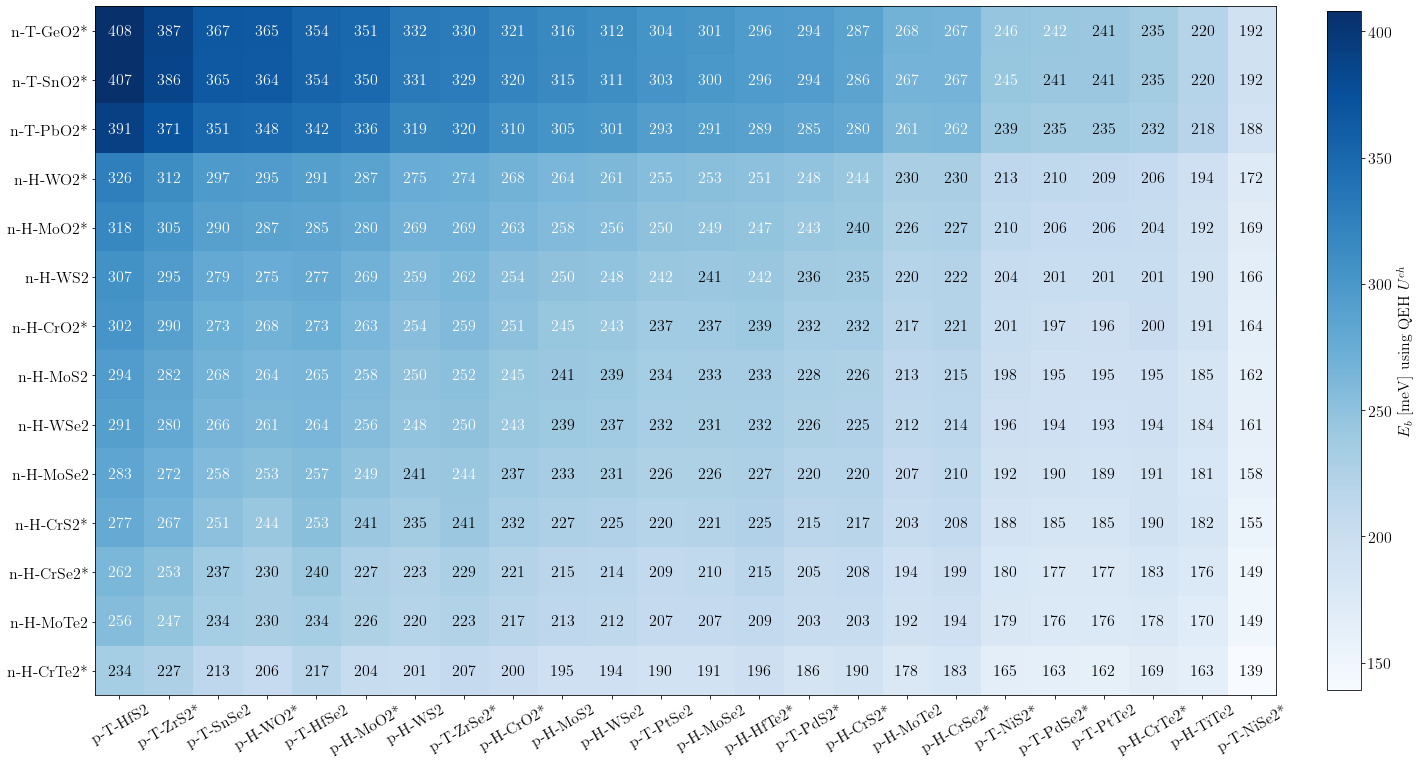

In [48]:
if np.shape(E_b_heat_mat)[0]>10:
    fig = plt.figure(1, figsize=(20,20))
else:
    fig = plt.figure(1, figsize=(6,6))
plt.xticks(rotation=30)
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n using QEH masses and potentials'.format(nPadding, nFilling))
plot_E_B(E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')
if np.shape(E_b_heat_mat)[0]>10:
    fig = plt.figure(1, figsize=(20,20))
else:
    fig = plt.figure(1, figsize=(6,6))
plt.xticks(rotation=30)
plot_E_B(E_b_heat_mat=EbPlot,E_b_heat_xlabels=xlabelsPlot,E_b_heat_ylabels=ylabelsPlot, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')

## Analytic Coulomb potential using QEH Masses

0 13
0 22
0 21
0 10
0 14
0 5
0 11
0 23
0 0
0 6
0 12
0 19
0 7
0 4
0 17
0 1
0 8
0 2
0 15
0 18
0 20
0 3
0 9
0 16
13 13
13 22
13 21
13 10
13 14
13 5
13 11
13 23
13 0
13 6
13 12
13 19
13 7
13 4
13 17
13 1
13 8
13 2
13 15
13 18
13 20
13 3
13 9
13 16
12 13
12 22
12 21
12 10
12 14
12 5
12 11
12 23
12 0
12 6
12 12
12 19
12 7
12 4
12 17
12 1
12 8
12 2
12 15
12 18
12 20
12 3
12 9
12 16
8 13
8 22
8 21
8 10
8 14
8 5
8 11
8 23
8 0
8 6
8 12
8 19
8 7
8 4
8 17
8 1
8 8
8 2
8 15
8 18
8 20
8 3
8 9
8 16
4 13
4 22
4 21
4 10
4 14
4 5
4 11
4 23
4 0
4 6
4 12
4 19
4 7
4 4
4 17
4 1
4 8
4 2
4 15
4 18
4 20
4 3
4 9
4 16
9 13
9 22
9 21
9 10
9 14
9 5
9 11
9 23
9 0
9 6
9 12
9 19
9 7
9 4
9 17
9 1
9 8
9 2
9 15
9 18
9 20
9 3
9 9
9 16
0 13
0 22
0 21
0 10
0 14
0 5
0 11
0 23
0 0
0 6
0 12
0 19
0 7
0 4
0 17
0 1
0 8
0 2
0 15
0 18
0 20
0 3
0 9
0 16
5 13
5 22
5 21
5 10
5 14
5 5
5 11
5 23
5 0
5 6
5 12
5 19
5 7
5 4
5 17
5 1
5 8
5 2
5 15
5 18
5 20
5 3
5 9
5 16
10 13
10 22
10 21
10 10
10 14
10 5
10 11
10 23
10 0
10 6
10 12
10 19
10 

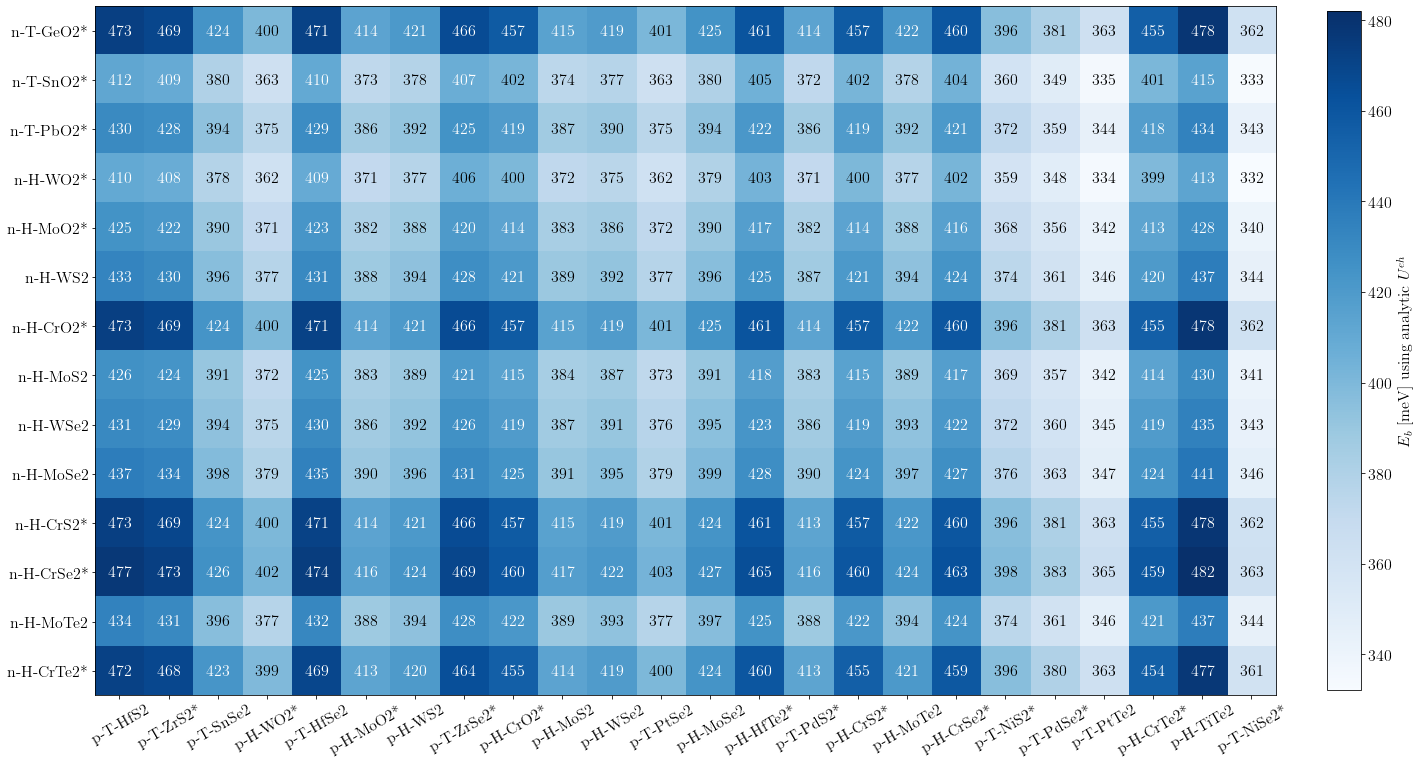

In [55]:
vdWH_analytic = load_hs('wannier_analytic',default_thick, nFilling, nPadding)
E_b_heat_mat = vdWH_analytic['E_b_heat_mat']
E_b_heat_matPlot = sort_matrix(E_b_heat_mat,RowOrder,ColumnOrder)
#E_b_heat_xlabels = vdWH_analytic['E_b_heat_xlabels']
#E_b_heat_ylabels = vdWH_analytic['E_b_heat_ylabels']
print(E_b_heat_mat)
fig = plt.figure(1, figsize=(20,20))
plt.xticks(rotation=30)
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n Analytic Coulomb Potential using QEH Masses'.format(nPadding, nFilling))
plot_E_B(E_b_heat_matPlot,xlabelsPlot,ylabelsPlot, cbarlabel=r'$E_b$ [meV] using analytic $U^{eh}$', file_ending='analytic')

0 13
0 22
0 21
0 10
0 14
0 5
0 11
0 23
0 0
0 6
0 12
0 19
0 7
0 4
0 17
0 1
0 8
0 2
0 15
0 18
0 20
0 3
0 9
0 16
13 13
13 22
13 21
13 10
13 14
13 5
13 11
13 23
13 0
13 6
13 12
13 19
13 7
13 4
13 17
13 1
13 8
13 2
13 15
13 18
13 20
13 3
13 9
13 16
12 13
12 22
12 21
12 10
12 14
12 5
12 11
12 23
12 0
12 6
12 12
12 19
12 7
12 4
12 17
12 1
12 8
12 2
12 15
12 18
12 20
12 3
12 9
12 16
8 13
8 22
8 21
8 10
8 14
8 5
8 11
8 23
8 0
8 6
8 12
8 19
8 7
8 4
8 17
8 1
8 8
8 2
8 15
8 18
8 20
8 3
8 9
8 16
4 13
4 22
4 21
4 10
4 14
4 5
4 11
4 23
4 0
4 6
4 12
4 19
4 7
4 4
4 17
4 1
4 8
4 2
4 15
4 18
4 20
4 3
4 9
4 16
9 13
9 22
9 21
9 10
9 14
9 5
9 11
9 23
9 0
9 6
9 12
9 19
9 7
9 4
9 17
9 1
9 8
9 2
9 15
9 18
9 20
9 3
9 9
9 16
0 13
0 22
0 21
0 10
0 14
0 5
0 11
0 23
0 0
0 6
0 12
0 19
0 7
0 4
0 17
0 1
0 8
0 2
0 15
0 18
0 20
0 3
0 9
0 16
5 13
5 22
5 21
5 10
5 14
5 5
5 11
5 23
5 0
5 6
5 12
5 19
5 7
5 4
5 17
5 1
5 8
5 2
5 15
5 18
5 20
5 3
5 9
5 16
10 13
10 22
10 21
10 10
10 14
10 5
10 11
10 23
10 0
10 6
10 12
10 19
10 

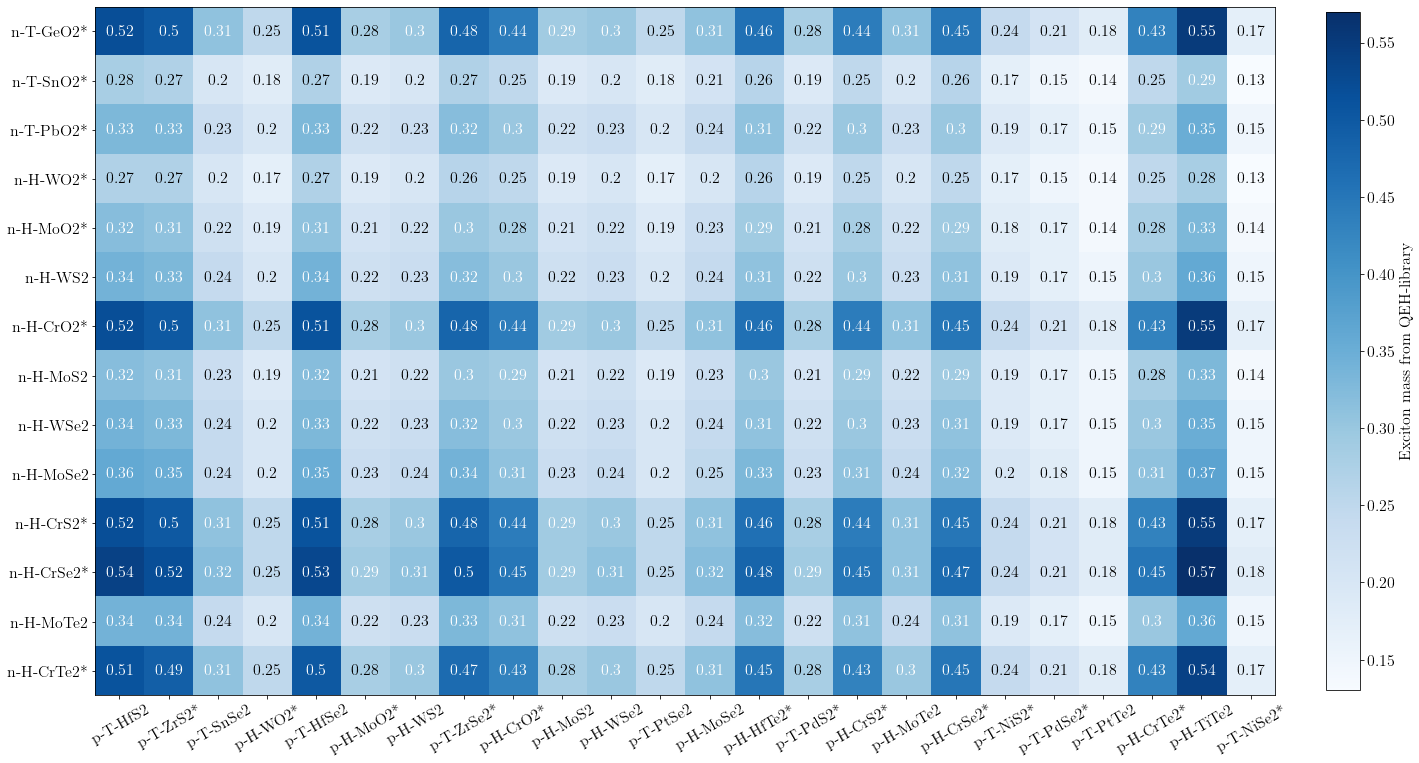

In [57]:
#hallihalløj
#effective masses that we use
mu_matrix = vdWH_analytic['effmass_Matrix']
mu_matrixPlot = sort_matrix(mu_matrix,RowOrder,ColumnOrder)
description = 'Exciton mass from QEH'
print(description)
print(mu_matrix)
fig = plt.figure(1, figsize=(20,20))
heatmap(np.round(mu_matrixPlot,2),xlabelsPlot,ylabelsPlot, cbarlabel=r'Exciton mass from QEH-library',
    cmap='Blues')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./plots/vdWH_excMass_QEH.pdf')
plt.savefig('./plots/vdWH_excMass_QEH.png')
plt.show()

### Plot of exciton masses from QEH-Library

Exciton mass from QEH
[[0.16746269 0.20337209 0.17217391 0.21032967]
 [0.18987013 0.23739583 0.19594937 0.24693069]
 [0.18164384 0.22467391 0.1872     0.23319588]
 [0.20072289 0.25460784 0.20752941 0.26560748]]


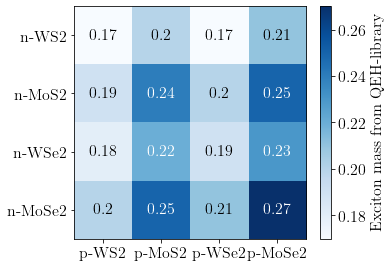

In [40]:
#effective masses that we use
me_vec=np.array([0.33,0.43,0.39,0.49])
mh_vec=np.array([0.34,0.53,0.36,0.58])

description = 'Exciton mass from QEH'
print(description)
mu_matrix=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mu_matrix[i,j]=1/(1/me_vec[i]+1/mh_vec[j])
print(mu_matrix)
heatmap(np.round(mu_matrix,2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'Exciton mass from QEH-library',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_excMass_QEH.pdf')
plt.savefig('./plots/vdWH_excMass_QEH.png')
plt.show()

## Analytic Coulomb potential using Masses from Conti S. et al.

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers
 Analytic Coulomb Potential using Masses from Conti et al.


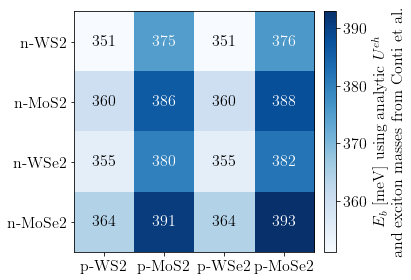

In [41]:
vdWH_analytic = load_hs('wannier_analytic_article_masses', nFilling, nPadding)
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n Analytic Coulomb Potential using Masses from Conti et al.'.format(nPadding, nFilling))
plot_E_B(vdWH_analytic, cbarlabel='$E_b$ [meV] using analytic $U^{eh}$ \n and exciton masses from Conti et al.', file_ending='analytic_articMass')

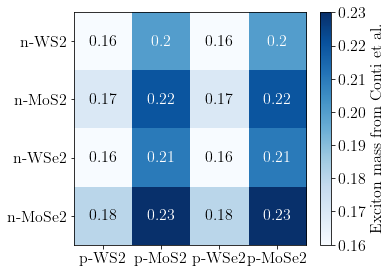

In [42]:
#data from article
me_vec=np.array([0.33,0.40,0.36,0.43])
mh_vec=np.array([0.30,0.48,0.30,0.50])

mu_matrix=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mu_matrix[i,j]=1/(1/me_vec[i]+1/mh_vec[j])
heatmap(np.round(mu_matrix,2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'Exciton mass from Conti et al.',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_effMass_article.pdf')
plt.savefig('./plots/vdWH_effMass_article.png')
plt.show()

## Exciton Binding Energies from Conti et al.

In [43]:
Eb_article=np.array([[375,375,368,385],[390,396,388,405],[368,372,365,375],[400,405,390,412]])
Eb_article.transpose().flatten()

array([375, 390, 368, 400, 375, 396, 372, 405, 368, 388, 365, 390, 385,
       405, 375, 412])

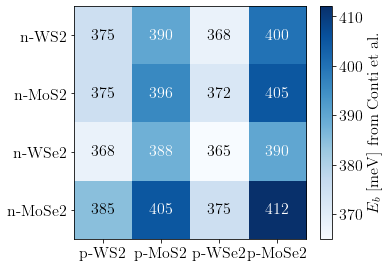

In [44]:
# Eb_matrix=np.array([[396,405,390,388],[405,412,400,390],[375,385,375,368],[372,375,368,365]]) # MoS2, MoSe2, WS2, WSe2
Eb_article=np.array([[375,375,368,385],[390,396,388,405],[368,372,365,375],[400,405,390,412]])
heatmap(np.round(Eb_article).transpose(),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] from Conti et al.',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_E_b_article_transpose.pdf')
plt.savefig('./plots/vdWH_E_b_article_transpose.png')
plt.show()

## QEH potential using Masses from Conti S. et al.

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers
 QEH Potential using Masses from Conti et al.


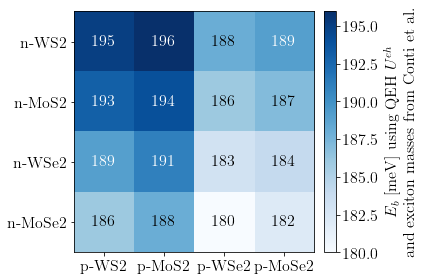

In [45]:
vdWH_qeh_article_masses = load_hs('wannier_qeh_article_masses', nFilling, nPadding)
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n QEH Potential using Masses from Conti et al.'.format(nPadding, nFilling))
plot_E_B(vdWH_qeh_article_masses, cbarlabel='$E_b$ [meV] using QEH $U^{eh}$ \n and exciton masses from Conti et al.', file_ending='qeh_articMass')

# Discussion: Comparison of Binding energies from Conti et al. and Wannier model using QEH and screened potential

In [46]:
def read_bilayer_E_b(bilayer, vdWH):
    '''@returns U_ee, U_eh, U_eh_r, epsM, E_b
    '''
    i = list(vdWH['bilayer']).index(bilayer)
    E_b = vdWH['E_b'][i]
    return E_b

In [47]:
bilayers = ['n-WS2, p-WS2', 'n-MoS2, p-MoS2', 'n-WSe2, p-WSe2', 'n-MoSe2, p-MoSe2']

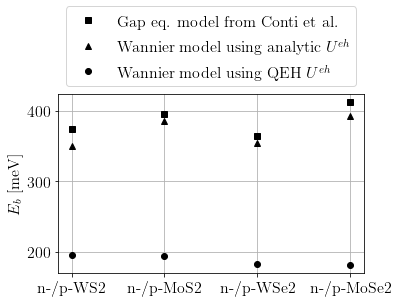

In [91]:
fig = plt.figure(1,figsize=(5.8,4.5))
E_bs_article = np.zeros(len(bilayers))
E_bs_analytic = np.zeros(len(bilayers))
E_bs_qeh = np.zeros(len(bilayers))
for (i, bilayer) in enumerate(bilayers):
    j = list(vdWH_qeh_article_masses['bilayer']).index(bilayer)
    E_bs_article[i] = Eb_article.transpose().flatten()[j] * 10**(-3)

    E_bs_analytic[i] = read_bilayer_E_b(bilayer, vdWH_analytic)
    E_bs_qeh[i] = read_bilayer_E_b(bilayer, vdWH_qeh_article_masses)

xtick_labels = ['n-/p-' + m for m in materials]
plt.plot(xtick_labels, E_bs_article*10**3, 'ks', label='Gap eq. model from Conti et al.')
plt.plot(xtick_labels, E_bs_analytic*10**3, 'k^', label='Wannier model using analytic $U^{eh}$')
plt.plot(xtick_labels, E_bs_qeh*10**3, 'ko', label='Wannier model using QEH $U^{eh}$')
plt.ylabel(r'$E_b$ [meV]')
plt.grid()
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=1)
plt.tight_layout()
plt.savefig('./plots/E_b_comparison.pdf')
plt.savefig('./plots/E_b_comparison.png')